# 06_01 THE BEST ESTIMATOR_V3

## MODELAR ALGORITMO DE CLASIFICACIÓN 

Vamos a parametrizar el algoritmo con mejor roc_auc del entrenamiento y evaluación con modelos base y preselección de variables.

ExtraTreesClassifier()

## IMPORTACIÓN DE PAQUETES

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Crear datasets de entrenamiento y validación
from sklearn.model_selection import train_test_split

#Modelos de clasificación
from sklearn.ensemble import AdaBoostClassifier


#Optimizar modelo
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
import scikitplot as skplt

#Crear Pipeline
from sklearn.pipeline import Pipeline


import cloudpickle



## IMPORTACIÓN DE DATOS

## CARGAR LOS DATOS

In [35]:
x = pd.read_pickle('../../02_Datos/03_Trabajo/x_preseleccionado.pickle')
y = pd.read_pickle('../../02_Datos/03_Trabajo/y_preseleccionado.pickle')

In [36]:
#Verificamos predictoras

print(x.shape)
x.head()

(70, 6)


,edad,e_infantil,hr_sentado,frec_alcohol,fumar,estacion
0,0.69,0,0.88,0.8,0,-0.33
1,0.94,1,0.31,0.8,1,-0.33
2,0.50,1,0.50,1.0,-1,-0.33
4,0.67,1,0.50,0.8,-1,-0.33
5,0.67,1,0.50,0.8,0,-0.33


In [37]:
#Verificamos target
print(y.shape)
y.head()

(70,)


0    0
1    1
2    0
4    1
5    0
Name: produccion, dtype: int64

## MODELIZAR

### RESERVAR LOS DATASET DE ENTRENAMIENTO Y VALIDACIÓN

In [38]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state = 42)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES 

In [39]:
pipe = Pipeline([('algoritmo', AdaBoostClassifier())])

grid =  [
            {   'algoritmo' : [AdaBoostClassifier()],
                'algoritmo__n_estimators': [50, 100, 200, 300],       # Número de estimadores (número de árboles débiles)
                'algoritmo__learning_rate': [0.01, 0.1, 1.0, 2.0],   # Tasa de aprendizaje (peso de cada árbol en el ensamble)
                'algoritmo__algorithm': ['SAMME', 'SAMME.R'],          # Algoritmo utilizado (SAMME o SAMME.R)
            }
        ]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [40]:
grid_search = GridSearchCV( estimator= pipe,
                           param_grid= grid,
                           cv = 5,
                           scoring= 'roc_auc',
                           verbose=0,
                           n_jobs= -1
                        )

modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__algorithm,param_algoritmo__learning_rate,param_algoritmo__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,1.057990,0.020337,0.121624,0.011655,AdaBoostClassifier(n_estimators=300),SAMME.R,1.0,300,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.722222,1.000000,0.444444,0.87500,0.6875,0.745833,0.187659,1
8,0.095393,0.005164,0.009888,0.000473,AdaBoostClassifier(n_estimators=300),SAMME,1.0,50,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.611111,1.000000,0.444444,1.00000,0.6250,0.736111,0.224640,2
26,0.688964,0.018538,0.078027,0.002573,AdaBoostClassifier(n_estimators=300),SAMME.R,1.0,200,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.611111,1.000000,0.444444,0.87500,0.6875,0.723611,0.195552,3
25,0.352953,0.017156,0.044461,0.001986,AdaBoostClassifier(n_estimators=300),SAMME.R,1.0,100,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.611111,1.000000,0.444444,0.87500,0.6875,0.723611,0.195552,3
9,0.203824,0.004359,0.018064,0.002584,AdaBoostClassifier(n_estimators=300),SAMME,1.0,100,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.611111,1.000000,0.444444,0.87500,0.6250,0.711111,0.199420,5
10,0.565253,0.107229,0.053490,0.016583,AdaBoostClassifier(n_estimators=300),SAMME,1.0,200,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.611111,1.000000,0.444444,0.87500,0.6250,0.711111,0.199420,5
23,1.076932,0.046423,0.122175,0.011066,AdaBoostClassifier(n_estimators=300),SAMME.R,0.1,300,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.611111,1.000000,0.555556,0.87500,0.5000,0.708333,0.194444,7
24,0.187330,0.022576,0.027969,0.005581,AdaBoostClassifier(n_estimators=300),SAMME.R,1.0,50,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.611111,1.000000,0.444444,0.87500,0.5625,0.698611,0.206268,8
11,0.667154,0.074423,0.045878,0.001343,AdaBoostClassifier(n_estimators=300),SAMME,1.0,300,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.611111,1.000000,0.444444,0.81250,0.6250,0.698611,0.190516,9
7,0.677776,0.133265,0.052352,0.005815,AdaBoostClassifier(n_estimators=300),SAMME,0.1,300,{'algoritmo': AdaBoostClassifier(n_estimators=...,0.555556,1.000000,0.555556,1.00000,0.3750,0.697222,0.255857,10


In [41]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo', AdaBoostClassifier(n_estimators=300))])

In [42]:
modelo.best_params_

{'algoritmo': AdaBoostClassifier(n_estimators=300),
 'algoritmo__algorithm': 'SAMME.R',
 'algoritmo__learning_rate': 1.0,
 'algoritmo__n_estimators': 300}

In [43]:
modelo.best_score_

0.7458333333333333

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [44]:
modelo_best_estimator = modelo

#### Guardar modelo, parámetros y score

In [45]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PREDECIR Y EVALUAR SOBRE EL TRAIN

### Predecir sobre el Train

In [46]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [47]:
t_roc_auc = roc_auc_score(train_y, pred)
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Roc AUC: {t_roc_auc}")
print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Roc AUC: 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00         6

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

### Predecir sobre la validación

In [48]:
pred = modelo.best_estimator_.predict(val_x)
pred_proba = modelo.best_estimator_.predict_proba(val_x)[:,1]

### Evaluar sobre la validación

In [49]:
v_roc_auc_proba = roc_auc_score(val_y, pred_proba)
v_roc_auc = roc_auc_score(val_y, pred)
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:{v_report}")

Roc AUC_proba: 0.574074074074074
Roc AUC: 0.5277777777777778
Accuracy: 0.6666666666666666
Classification Report:              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.17      0.33      0.22         3

    accuracy                           0.67        21
   macro avg       0.52      0.53      0.51        21
weighted avg       0.77      0.67      0.71        21



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

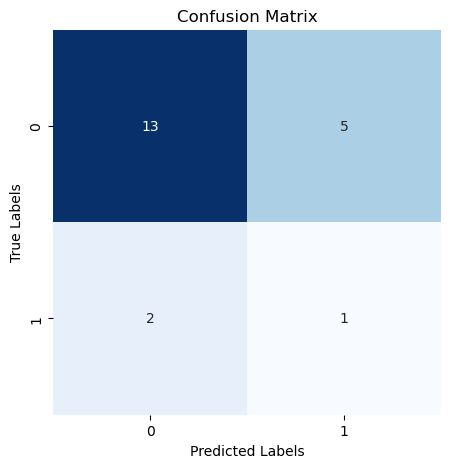

In [50]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Gain Chart

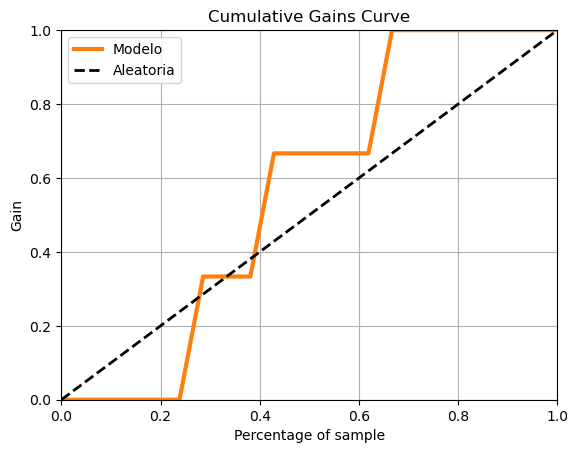

In [51]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()               
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

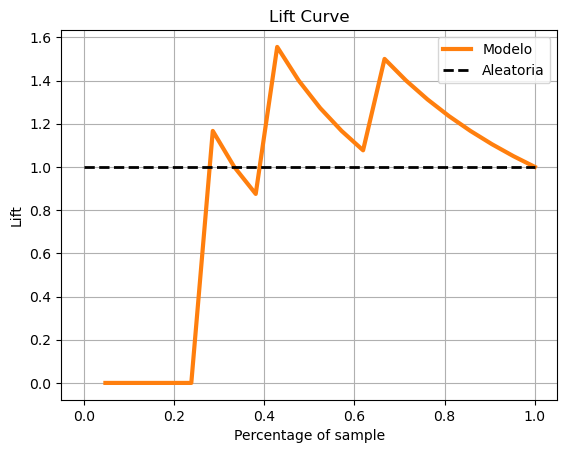

In [52]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()                
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

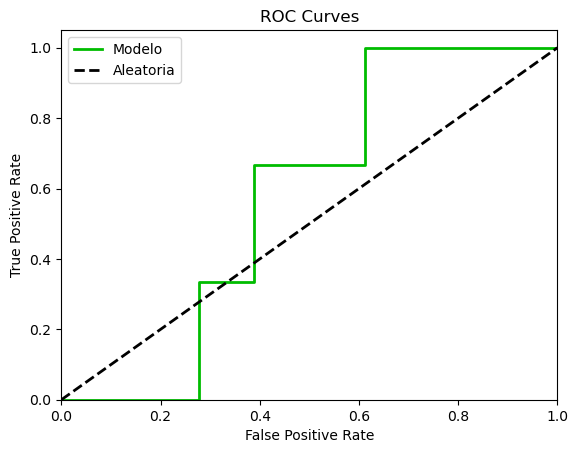

In [53]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()            
ax.lines[1].remove()
ax.lines[1].remove()
plt.legend(labels = ['Modelo','Aleatoria']);

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [54]:
version_estimator = '_v03'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'AdaBoostClassifier_v03.pickle'

In [55]:
m_best_estimator

'AdaBoostClassifier'

In [56]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [57]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Modelo AdaClassifier con parámetros para evitar el sobreajuste y preselección de variables"
x_columns = list(x.columns)
y_target = y.name


In [58]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_roc_auc_proba': v_roc_auc_proba,
               'v_roc_auc': v_roc_auc,
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                   AdaBoostClassifier
m_Best_paramans     {'algoritmo': AdaBoostClassifier(n_estimators=...
m_Best_Score                                       0.7458333333333333
t_accuracy                                                        1.0
t_report                          precision    recall  f1-score   ...
v_roc_auc_proba                                              0.574074
v_roc_auc                                                    0.527778
v_accuracy                                                   0.666667
v_report                          precision    recall  f1-score   ...
comentarios         Modelo AdaClassifier con parámetros para evita...
predictoras_X       [edad, e_infantil, hr_sentado, frec_alcohol, f...
target_y                                                   produccion
Name: AdaBoostClassifier_v03.pickle, dtype: object

In [59]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [60]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')

**CONCLUSIÓN**: Vemos que la preselección de variables no ha ayudado a mejorar la predicción del modelo. 